<a href="https://colab.research.google.com/github/jgamel/learn_n_dev/blob/python_modeling_forecasting/Time_Series_Forecasting_Prophet_Python_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time Series Forecasting With Prophet in Python

Time series forecasting can be challenging as there are many different methods you could use and many different hyperparameters for each method.

The Prophet library is an open-source library designed for making forecasts for univariate time series datasets. It is easy to use and designed to automatically find a good set of hyperparameters for the model in an effort to make skillful forecasts for data with trends and seasonal structure by default.

In this tutorial, you will discover how to use the Facebook Prophet library for time series forecasting.

After completing this tutorial, you will know:

* Prophet is an open-source library developed by Facebook and designed for automatic forecasting of univariate time series data.
* How to fit Prophet models and use them to make in-sample and out-of-sample forecasts.
* How to evaluate a Prophet model on a hold-out dataset.


Tutorial Overview
This tutorial is divided into three parts; they are:

1.  Prophet Forecasting Library
2.  Car Sales Dataset
  1.  Load and Summarize Dataset
  2. Load and Plot Dataset
3.  Forecast Car Sales With Prophet
  1. Fit Prophet Model
  2. Make an In-Sample Forecast
  3. Make an Out-of-Sample Forecast
  4. Manually Evaluate Forecast Model

## Prophet Forecasting Library

Prophet, or “Facebook Prophet,” is an open-source library for univariate (one variable) time series forecasting developed by Facebook.

Prophet implements what they refer to as an additive time series forecasting model, and the implementation supports trends, seasonality, and holidays.

It is designed to be easy and completely automatic, e.g. point it at a time series and get a forecast. As such, it is intended for internal company use, such as forecasting sales, capacity, etc.

For a great overview of Prophet and its capabilities, see the post:

[Prophet: forecasting at scale, 2017.](https://research.facebook.com/blog/2017/02/prophet-forecasting-at-scale/)

The library provides two interfaces, including R and Python. We will focus on the Python interface in this tutorial.

The first step is to install the Prophet library using Pip, as follows:

In [ ]:
!pip install fbprophet

Next, we can confirm that the library was installed correctly.

To do this, we can import the library and print the version number in Python. The complete example is listed below.

In [ ]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


Running the example prints the installed version of Prophet.

Now that we have Prophet installed, let’s select a dataset we can use to explore using the library.

## Car Sales Dataset

We will use the monthly car sales dataset.

It is a standard univariate time series dataset that contains both a trend and seasonality. The dataset has 108 months of data and a naive persistence forecast can achieve a mean absolute error of about 3,235 sales, providing a lower error limit.

No need to download the dataset as we will download it automatically as part of each example.

###Load and Summarize Dataset

First, let’s load and summarize the dataset.

Prophet requires data to be in Pandas DataFrames. Therefore, we will load and summarize the data using Pandas.

We can load the data directly from the URL by calling the read_csv() Pandas function, then summarize the shape (number of rows and columns) of the data and view the first few rows of data.

The complete example is listed below.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
# load the car sales dataset
from pandas import read_csv
# load data
path = '/content/gdrive/My Drive/input_examples/monthly-car-sales.csv'
df = read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


Running the example first reports the number of rows and columns, then lists the first five rows of data.

We can see that as we expected, there are 108 months worth of data and two columns. The first column is the date and the second is the number of sales.

Note that the first column in the output is a row index and is not a part of the dataset, just a helpful tool that Pandas uses to order rows.

### Load and Plot Dataset

A time-series dataset does not make sense to us until we plot it.

Plotting a time series helps us actually see if there is a trend, a seasonal cycle, outliers, and more. It gives us a feel for the data.

We can plot the data easily in Pandas by calling the plot() function on the DataFrame.

The complete example is listed below.

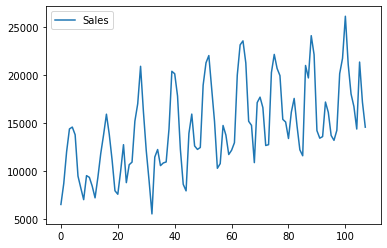

In [6]:
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
path = '/content/gdrive/My Drive/input_examples/monthly-car-sales.csv'
df = read_csv(path, header=0)
# plot the time series
df.plot()
pyplot.show()

Running the example creates a plot of the time series.

We can clearly see the trend in sales over time and a monthly seasonal pattern to the sales. These are patterns we expect the forecast model to take into account.

Now that we are familiar with the dataset, let’s explore how we can use the Prophet library to make forecasts.

## Forecast Car Sales With Prophet

In this section, we will explore using the Prophet to forecast the car sales dataset.

Let’s start by fitting a model on the dataset

### Fit Prophet Model

To use Prophet for forecasting, first, a Prophet() object is defined and configured, then it is fit on the dataset by calling the fit() function and passing the data.

The Prophet() object takes arguments to configure the type of model you want, such as the type of growth, the type of seasonality, and more. By default, the model will work hard to figure out almost everything automatically.

The fit() function takes a DataFrame of time series data. The DataFrame must have a specific format. The first column must have the name ‘ds‘ and contain the date-times. The second column must have the name ‘y‘ and contain the observations.

This means we change the column names in the dataset. It also requires that the first column be converted to date-time objects, if they are not already (e.g. this can be down as part of loading the dataset with the right arguments to read_csv).

For example, we can modify our loaded car sales dataset to have this expected structure, as follows:

In [2]:
# fit prophet model on the car sales dataset
from pandas import read_csv
from pandas import to_datetime
from fbprophet import Prophet
# load data
path = '/content/gdrive/My Drive/input_examples/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Running the example loads the dataset, prepares the DataFrame in the expected format, and fits a Prophet model.


###Make an In-Sample Forecast

It can be useful to make a forecast on historical data.

That is, we can make a forecast on data used as input to train the model. Ideally, the model has seen the data before and would make a perfect prediction.

Nevertheless, this is not the case as the model tries to generalize across all cases in the data.

This is called making an in-sample (in training set sample) forecast and reviewing the results can give insight into how good the model is. That is, how well it learned the training data.

A forecast is made by calling the predict() function and passing a DataFrame that contains one column named ‘ds‘ and rows with date-times for all the intervals to be predicted.

There are many ways to create this “forecast” DataFrame. In this case, we will loop over one year of dates, e.g. the last 12 months in the dataset, and create a string for each month. We will then convert the list of dates into a DataFrame and convert the string values into date-time objects.

```
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
```

This DataFrame can then be provided to the predict() function to calculate a forecast.

The result of the predict() function is a DataFrame that contains many columns. Perhaps the most important columns are the forecast date time (‘ds‘), the forecasted value (‘yhat‘), and the lower and upper bounds on the predicted value (‘yhat_lower‘ and ‘yhat_upper‘) that provide uncertainty of the forecast.

For example, we can print the first few predictions as follows:

```
...
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
```

Prophet also provides a built-in tool for visualizing the prediction in the context of the training dataset.

This can be achieved by calling the plot() function on the model and passing it a result DataFrame. It will create a plot of the training dataset and overlay the prediction with the upper and lower bounds for the forecast dates.

```
...
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()
```

Tying this all together, a complete example of making an in-sample forecast is listed below.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


           ds          yhat    yhat_lower    yhat_upper
0  1968-01-01  14334.737769  12757.663733  15885.846601
1  1968-02-01  14905.955964  13352.045731  16571.614364
2  1968-03-01  20842.150502  19271.521924  22538.128075
3  1968-04-01  22870.095215  21210.127735  24387.366916
4  1968-05-01  24176.211162  22574.321448  25740.625210
5  1968-06-01  21057.679190  19445.330997  22570.904182
6  1968-07-01  17585.489428  16122.254779  19239.575511
7  1968-08-01  15289.261887  13665.243338  16865.058524
8  1968-09-01  13721.438281  12279.794788  15321.808981
9  1968-10-01  18133.910877  16543.722856  19669.349154
10 1968-11-01  17431.759820  15902.027986  18975.211176
11 1968-12-01  15655.287282  14180.434800  17155.495773


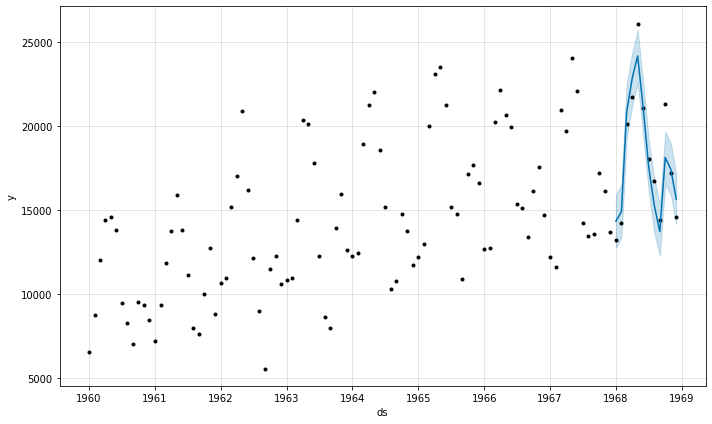

In [26]:
# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
# load data
path = '/content/gdrive/My Drive/input_examples/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(12))
# plot forecast
model.plot(forecast)
pyplot.show()

Running the example forecasts the last 12 months of the dataset.

The first five months of the prediction are reported and we can see that values are not too different from the actual sales values in the dataset.

###Make an Out-of-Sample Forecast

In practice, we really want a forecast model to make a prediction beyond the training data.

This is called an out-of-sample forecast.

We can achieve this in the same way as an in-sample forecast and simply specify a different forecast period.

In this case, a period beyond the end of the training dataset, starting 1969-01.

```
...
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
```

Tying this together, the complete example is listed below.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15375.960093  13905.471437  16932.568340
1 1969-02-01  16142.271673  14492.910346  17665.850743
2 1969-03-01  21351.832640  19774.837160  22959.559840
3 1969-04-01  23477.889811  21822.677981  25080.545895
4 1969-05-01  24988.440907  23374.811308  26579.427779


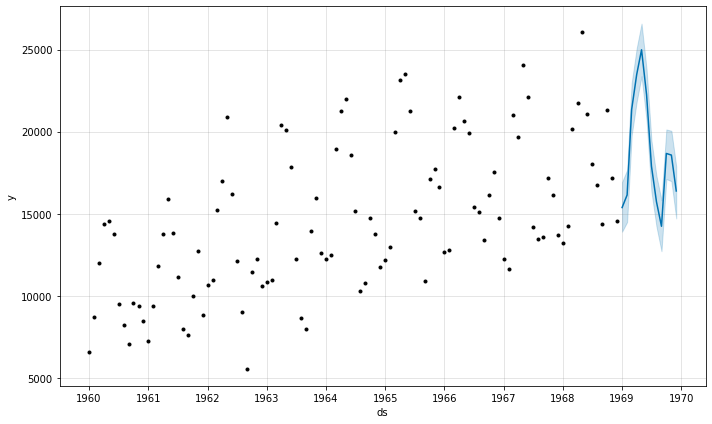

In [27]:
# make an out-of-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
# load data
path = '/content/gdrive/My Drive/input_examples/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

Running the example makes an out-of-sample forecast for the car sales data.

The first five rows of the forecast are printed, although it is hard to get an idea of whether they are sensible or not.



### Manually Evaluate Forecast Model

It is critical to develop an objective estimate of a forecast model’s performance.

This can be achieved by holding some data back from the model, such as the last 12 months. Then, fitting the model on the first portion of the data, using it to make predictions on the held-pack portion, and calculating an error measure, such as the mean absolute error across the forecasts. E.g. a simulated out-of-sample forecast.

The score gives an estimate of how well we might expect the model to perform on average when making an out-of-sample forecast.

We can do this with the samples data by creating a new DataFrame for training with the last 12 months removed.

```
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())
```
A forecast can then be made on the last 12 months of date-times.

We can then retrieve the forecast values and the expected values from the original dataset and calculate a mean absolute error metric using the scikit-learn library.

```
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
```

It can also be helpful to plot the expected vs. predicted values to see how well the out-of-sample prediction matches the known values.

```
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()
```

Tying this together, the example below demonstrates how to evaluate a Prophet model on a hold-out dataset.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713
MAE: 1336.814


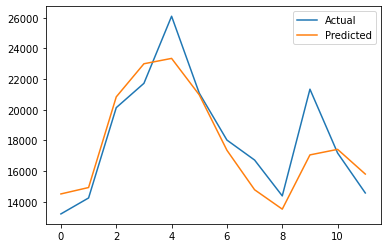

In [28]:
# evaluate prophet time series forecasting model on hold out dataset
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# load data
path = '/content/gdrive/My Drive/input_examples/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

Running the example first reports the last few rows of the training dataset.

It confirms the training ends in the last month of 1967 and 1968 will be used as the hold-out dataset.


Next, a mean absolute error is calculated for the forecast period.

In this case we can see that the error is approximately 1,336 sales, which is much lower (better) than a naive persistence model that achieves an error of 3,235 sales over the same period.

Finally, a plot is created comparing the actual vs. predicted values. In this case, we can see that the forecast is a good fit. The model has skill and forecast that looks sensible.

The Prophet library also provides tools to automatically evaluate models and plot results, although those tools don’t appear to work well with data above one day in resolution.

